In [196]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import enchant
import re
import math
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [174]:
print(np.__version__)
print(pd.__version__)
print(tf.__version__)
print(format(matplotlib.__version__))

1.19.5
1.0.5
2.6.2
3.2.2


# učitavanje tablica

## train:


In [3]:
train_bodies_data = pd.read_csv('fnc-1/train_bodies.csv')
train_stances_data = pd.read_csv('fnc-1/train_stances.csv')

In [4]:
train_bodies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Body ID      1683 non-null   int64 
 1   articleBody  1683 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [5]:
train_stances_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49972 entries, 0 to 49971
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  49972 non-null  object
 1   Body ID   49972 non-null  int64 
 2   Stance    49972 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.1+ MB


In [6]:
train_bodies_data.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [7]:
train_stances_data.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


## test:


In [8]:
test_bodies_data = pd.read_csv('fnc-1/test_bodies.csv')

In [9]:
test_bodies_data.head()

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...


In [10]:
test_stances_unlabeled = pd.read_csv('fnc-1/test_stances_unlabeled.csv')

In [11]:
test_stances_unlabeled.head()

,Headline,Body ID
0,Ferguson riots: Pregnant woman loses eye after...,2008
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550
2,A Russian Guy Says His Justin Bieber Ringtone ...,2
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793
4,Argentina's President Adopts Boy to End Werewo...,37


## competition:

In [12]:
test_bodies_comp = pd.read_csv('fnc-1/competition_test_bodies.csv')

In [13]:
test_stances_comp = pd.read_csv('fnc-1/competition_test_stances.csv')

In [14]:
test_bodies_comp.head()

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...


In [15]:
test_stances_comp.head()

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated


# pripremanje databasea


In [16]:
train_stances_10 = train_stances_data

In [17]:
test_stances_comp_10 = test_stances_comp

### Imamo kopirano train stances i comp stances u 10 datoteke. Iduci korak zamijeni agree,disagree,discuss sa related

In [18]:
train_stances_10 = pd.DataFrame(columns = ['Headline', 'Body ID', 'Stance'])

In [19]:
test_stances_comp_10 = pd.DataFrame(columns = ['Headline', 'Body ID', 'Stance'])

In [20]:
train_stances_10.head()

,Headline,Body ID,Stance


In [21]:
test_stances_comp_10.head()

,Headline,Body ID,Stance


In [22]:
train_stances_data.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,agree
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,disagree


In [23]:
train_stances_data.reset_index()
i=0
for index, row in train_stances_data.iterrows():
    if row['Stance'] == 'agree' or row['Stance'] == 'disagree' or row['Stance'] == 'discuss':
        train_stances_10.loc[i] = [row['Headline'], row['Body ID'], 'related']
        i=i+1
    else:
        train_stances_10.loc[i] = [row['Headline'], row['Body ID'], 'unrelated']
        i=i+1

In [24]:
train_stances_10.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,related
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,related


In [25]:
print(len(train_stances_10))
print(len(train_stances_data))

49972
49972


In [26]:
test_stances_comp.reset_index()
i=0
for index, row in test_stances_comp.iterrows():
    if row['Stance'] == 'agree' or row['Stance'] == 'disagree' or row['Stance'] == 'discuss':
        test_stances_comp_10.loc[i] = [row['Headline'], row['Body ID'], 'related']
        i=i+1
    else:
        test_stances_comp_10.loc[i] = [row['Headline'], row['Body ID'], 'unrelated']
        i=i+1

In [27]:
test_stances_comp_10.head()

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated


In [28]:
print(len(test_stances_comp_10))
print(len(test_stances_comp))

25413
25413


### train_stances_10 je train_stances_data zamjenjen s unrelated/related

### test_stances_comp_10 je train_stances_comp zamjenjen s unrelated/related

In [29]:
train_bodies_data.head()

,Body ID,articleBody
0,0,A small meteorite crashed into a wooded area i...
1,4,Last week we hinted at what was to come as Ebo...
2,5,(NEWSER) – Wonder how long a Quarter Pounder w...
3,6,"Posting photos of a gun-toting child online, I..."
4,7,At least 25 suspected Boko Haram insurgents we...


In [30]:
train_stances_10.head()

,Headline,Body ID,Stance
0,Police find mass graves with at least '15 bodi...,712,unrelated
1,Hundreds of Palestinians flee floods in Gaza a...,158,related
2,"Christian Bale passes on role of Steve Jobs, a...",137,unrelated
3,HBO and Apple in Talks for $15/Month Apple TV ...,1034,unrelated
4,Spider burrowed through tourist's stomach and ...,1923,related


In [31]:
test_bodies_comp.head()

,Body ID,articleBody
0,1,Al-Sisi has denied Israeli reports stating tha...
1,2,A bereaved Afghan mother took revenge on the T...
2,3,CNBC is reporting Tesla has chosen Nevada as t...
3,12,A 4-inch version of the iPhone 6 is said to be...
4,19,GR editor’s Note\n\nThere are no reports in th...


In [32]:
test_stances_comp_10.head()

,Headline,Body ID,Stance
0,Ferguson riots: Pregnant woman loses eye after...,2008,unrelated
1,Crazy Conservatives Are Sure a Gitmo Detainee ...,1550,unrelated
2,A Russian Guy Says His Justin Bieber Ringtone ...,2,unrelated
3,"Zombie Cat: Buried Kitty Believed Dead, Meows ...",1793,unrelated
4,Argentina's President Adopts Boy to End Werewo...,37,unrelated


In [33]:
print(len(train_bodies_data))
print(len(train_stances_10))

1683
49972


In [34]:
print(len(test_bodies_comp))
print(len(test_stances_comp_10))

904
25413


In [35]:
train_merged = pd.merge(train_bodies_data, train_stances_10, left_on = 'Body ID', right_on = 'Body ID')
train_merged

,Body ID,articleBody,Headline,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,unrelated
...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,related


In [36]:
test_comp_merged = pd.merge(test_bodies_comp, test_stances_comp_10, left_on = 'Body ID', right_on = 'Body ID')
test_comp_merged

,Body ID,articleBody,Headline,Stance
0,1,Al-Sisi has denied Israeli reports stating tha...,Apple installing safes in-store to protect gol...,unrelated
1,1,Al-Sisi has denied Israeli reports stating tha...,El-Sisi denies claims he'll give Sinai land to...,related
2,1,Al-Sisi has denied Israeli reports stating tha...,Apple to keep gold Watch Editions in special i...,unrelated
3,1,Al-Sisi has denied Israeli reports stating tha...,Apple Stores to Keep Gold “Edition” Apple Watc...,unrelated
4,1,Al-Sisi has denied Israeli reports stating tha...,South Korean woman's hair 'eaten' by robot vac...,unrelated
...,...,...,...,...
25408,2586,Remember how much Republicans wanted to repeal...,A Sign That Obamacare Exchanges Are Failing,related
25409,2586,Remember how much Republicans wanted to repeal...,Republicans call Obamacare a 'failure.' These ...,related
25410,2586,Remember how much Republicans wanted to repeal...,CBO’s Alternate Facts Show Obamacare is Unsust...,related
25411,2586,Remember how much Republicans wanted to repeal...,Why Obamacare failed,related


# train word2vec

## levenstein distance not working

In [38]:
print(enchant.__version__)

3.2.2


In [39]:
#train_merged.reset_index()
#for index, row in train_merged.iterrows():
    #print(enchant.utils.levenshtein(row['articleBody'], row['Headline']), row['Stance'])

### split into sentences

In [40]:
print(re.__version__)

2.2.1


In [41]:
alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

In [42]:
text_sample = train_merged['articleBody'].iat[0]

In [43]:
sentences = split_into_sentences(text_sample)

In [44]:
print(sentences[0])

A small meteorite crashed into a wooded area in Nicaragua's capital of Managua overnight, the government said Sunday.


### print biggest cosine similarity and stance - test


In [45]:
#import math
#from collections import Counter

In [46]:
WORD = re.compile(r"\w+")

In [47]:
def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

In [48]:
def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)

In [49]:
vector1 = text_to_vector(sentences[0])
vector2 = text_to_vector(sentences[1])

In [209]:
vector1

Counter({'The': 1,
         'realtors': 1,
         'said': 1,
         'wanted': 1,
         'something': 1,
         'special': 1,
         'someone': 1,
         'service': 1,
         'industry': 1})

In [50]:
cosine = get_cosine(vector1, vector2)

print("Cosine:", cosine)

Cosine: 0.22496063533292376


### print biggest cosine similarity - real

In [51]:
w2vmaxtrain = pd.DataFrame(columns = ['w2vmax', 'Stance'])

In [52]:
train_merged.reset_index()
j=0
for index, row in train_merged.iterrows():
    split_sentences = split_into_sentences(row['articleBody'])
    max_similarity = 0
    for sent in split_sentences:
        vector1 = text_to_vector(sent)
        vector2 = text_to_vector(row['Headline'])
        cosine = get_cosine(vector1, vector2)
        if cosine > max_similarity:
            max_similarity = cosine
    w2vmaxtrain.loc[j] = [max_similarity, row['Stance']]
    j=j+1

### treba maknuti stopwords
average sada:

In [53]:
w2vavgtrain = pd.DataFrame(columns = ['w2vavg', 'Stance'])

In [54]:
train_merged.reset_index()
j=0
for index, row in train_merged.iterrows():
    split_sentences = split_into_sentences(row['articleBody'])
    sum_similarity = 0
    i=0
    for sent in split_sentences:
        vector1 = text_to_vector(sent)
        vector2 = text_to_vector(row['Headline'])
        cosine = get_cosine(vector1, vector2)
        sum_similarity = sum_similarity + cosine
        i=i+1
    if i!=0:
        sum_similarity = sum_similarity/i
    else:
        sum_similarity = 0
    w2vavgtrain.loc[j] = [sum_similarity, row['Stance']]
    j=j+1

### todo: stavi vrijednosti u matricu, skiciraj na graf, nađi točku prijeloma ili kombiniranu točku 

In [55]:
w2vavgtrain.head()

,w2vavg,Stance
0,0.002720,unrelated
1,0.000000,unrelated
2,0.035452,unrelated
3,0.023975,unrelated
4,0.140537,unrelated


In [56]:
w2vmaxtrain.head()

,w2vmax,Stance
0,0.043519,unrelated
1,0.000000,unrelated
2,0.155700,unrelated
3,0.091287,unrelated
4,0.211554,unrelated


In [57]:
final_train_merge = pd.merge(train_merged, w2vavgtrain, left_index=True, right_index=True)

In [58]:
final_train_merge = pd.merge(final_train_merge, w2vmaxtrain, left_index=True, right_index=True)

In [59]:
final_train_merge = final_train_merge.drop('Stance_x', 1)
final_train_merge = final_train_merge.drop('Stance_y', 1)

In [60]:
final_train_merge

,Body ID,articleBody,Headline,w2vavg,w2vmax,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0.002720,0.043519,unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0.000000,0.000000,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0.035452,0.155700,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0.023975,0.091287,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0.140537,0.211554,unrelated
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0.159184,0.383571,related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0.081550,0.218218,related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0.021383,0.128300,related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0.096955,0.304290,related


In [61]:
#import seaborn as sns

In [62]:
print(sns.__version__)

0.10.1


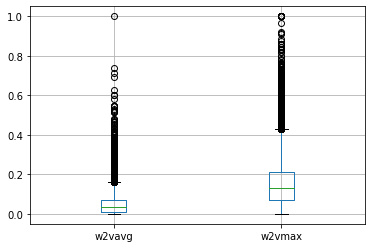

In [63]:
plt.figure()
final_train_merge.boxplot(['w2vavg', 'w2vmax'])

### boxplot - related unrelated

In [179]:
final_train_merge_samo_related = final_train_merge[final_train_merge.Stance == 'related']
final_train_merge_samo_unrelated = final_train_merge[final_train_merge.Stance == 'unrelated']

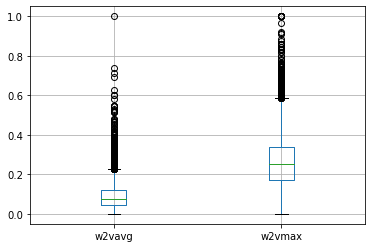

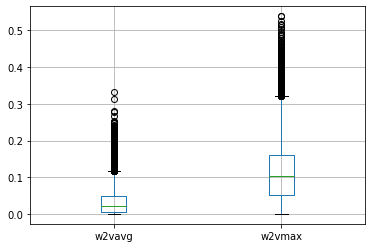

In [180]:
plt.figure()
final_train_merge_samo_related.boxplot(['w2vavg', 'w2vmax'])
plt.figure()
final_train_merge_samo_unrelated.boxplot(['w2vavg', 'w2vmax'])

# cilj: dobiti w2v od teksta sa stopwords maknutima

In [104]:
#import nltk
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#nltk.download('all')
stop_words = stopwords.words('english')

In [100]:
stop_final = final_train_merge

In [116]:
stop_final

,Body ID,articleBody,Headline,w2vavg,w2vmax,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0.002720,0.043519,unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0.000000,0.000000,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0.035452,0.155700,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0.023975,0.091287,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0.140537,0.211554,unrelated
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0.159184,0.383571,related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0.081550,0.218218,related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0.021383,0.128300,related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0.096955,0.304290,related


## save

In [117]:
final_train_merge.to_csv('final_train_merge.csv', index=False)

## test na jednom tekstu

In [124]:
first_text = stop_final.iloc[0]['articleBody']

In [125]:
word_tokens = word_tokenize(first_text)

In [126]:
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [127]:
print(filtered_sentence)

['A', 'small', 'meteorite', 'crashed', 'wooded', 'area', 'Nicaragua', "'s", 'capital', 'Managua', 'overnight', ',', 'government', 'said', 'Sunday', '.', 'Residents', 'reported', 'hearing', 'mysterious', 'boom', 'left', '16-foot', 'deep', 'crater', 'near', 'city', "'s", 'airport', ',', 'Associated', 'Press', 'reports', '.', 'Government', 'spokeswoman', 'Rosario', 'Murillo', 'said', 'committee', 'formed', 'government', 'study', 'event', 'determined', '``', 'relatively', 'small', "''", 'meteorite', '``', 'appears', 'come', 'asteroid', 'passing', 'close', 'Earth', '.', "''", 'House-sized', 'asteroid', '2014', 'RC', ',', 'measured', '60', 'feet', 'diameter', ',', 'skimmed', 'Earth', 'weekend', ',', 'ABC', 'News', 'reports', '.', 'Murillo', 'said', 'Nicaragua', 'ask', 'international', 'experts', 'help', 'local', 'scientists', 'understanding', 'happened', '.', 'The', 'crater', 'left', 'meteorite', 'radius', '39', 'feet', 'depth', '16', 'feet', ',', 'said', 'Humberto', 'Saballos', ',', 'volcan

In [131]:
filtered_sentence = ' '.join(filtered_sentence)

## nastavak - w2v na tekstovima bez stopwordsa

In [144]:
w2vavg_filtered = pd.DataFrame(columns = ['w2vavg_filtered', 'Stance'])

In [145]:
stop_final.reset_index()
j=0
for index, row in stop_final.iterrows():
    split_sentences = split_into_sentences(row['articleBody'])
    sum_similarity = 0
    i=0
    for sent in split_sentences:
        word_tokens = word_tokenize(sent)
        filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
        filtered_sentence = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        filtered_sentence = ' '.join(filtered_sentence)
        vector1 = text_to_vector(filtered_sentence)
        vector2 = text_to_vector(row['Headline'])
        cosine = get_cosine(vector1, vector2)
        sum_similarity = sum_similarity + cosine
        i=i+1
    if i!=0:
        sum_similarity = sum_similarity/i
    else:
        sum_similarity = 0
    w2vavg_filtered.loc[j] = [sum_similarity, row['Stance']]
    j=j+1

In [146]:
w2vavg_filtered

,w2vavg_filtered,Stance
0,0.000000,unrelated
1,0.000000,unrelated
2,0.000000,unrelated
3,0.000000,unrelated
4,0.003538,unrelated
...,...,...
49967,0.097407,related
49968,0.114112,related
49969,0.030817,related
49970,0.122182,related


In [264]:
w2vmax_filtered = pd.DataFrame(columns = ['w2vmax_filtered', 'Stance'])

In [265]:
stop_final.reset_index()
j=0
for index, row in stop_final.iterrows():
    split_sentences = split_into_sentences(row['articleBody'])
    max_similarity = float(0.0)
    for sent in split_sentences:
        word_tokens = word_tokenize(sent)
        filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
        filtered_sentence = []
        for w in word_tokens:
            if w not in stop_words:
                filtered_sentence.append(w)
        filtered_sentence = ' '.join(filtered_sentence)
        vector1 = text_to_vector(filtered_sentence)
        vector2 = text_to_vector(row['Headline'])
        cosine = get_cosine(vector1, vector2)
        if cosine > max_similarity:
            max_similarity = cosine
    w2vmax_filtered.loc[j] = [max_similarity, row['Stance']]
    j=j+1

In [266]:
w2vmax_filtered

,w2vmax_filtered,Stance
0,0.000000,unrelated
1,0.000000,unrelated
2,0.000000,unrelated
3,0.000000,unrelated
4,0.056614,unrelated
...,...,...
49967,0.322749,related
49968,0.314485,related
49969,0.184900,related
49970,0.350823,related


In [267]:
final_train_merge

,Body ID,articleBody,Headline,w2vavg,w2vmax,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0.002720,0.043519,unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0.000000,0.000000,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0.035452,0.155700,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0.023975,0.091287,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0.140537,0.211554,unrelated
...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0.159184,0.383571,related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0.081550,0.218218,related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0.021383,0.128300,related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0.096955,0.304290,related


In [268]:
w2vavg_filtered

,w2vavg_filtered,Stance
0,0.000000,unrelated
1,0.000000,unrelated
2,0.000000,unrelated
3,0.000000,unrelated
4,0.003538,unrelated
...,...,...
49967,0.097407,related
49968,0.114112,related
49969,0.030817,related
49970,0.122182,related


In [269]:
w2vmax_filtered

,w2vmax_filtered,Stance
0,0.000000,unrelated
1,0.000000,unrelated
2,0.000000,unrelated
3,0.000000,unrelated
4,0.056614,unrelated
...,...,...
49967,0.322749,related
49968,0.314485,related
49969,0.184900,related
49970,0.350823,related


In [270]:
final_train_merge_w2v = pd.merge(final_train_merge, w2vavg_filtered, left_index=True, right_index=True)

In [271]:
final_train_merge_w2v = pd.merge(final_train_merge_w2v, w2vmax_filtered, left_index=True, right_index=True)

In [272]:
final_train_merge_w2v = final_train_merge_w2v.drop('Stance_x', 1)

In [273]:
final_train_merge_w2v

,Body ID,articleBody,Headline,w2vavg,w2vmax,w2vavg_filtered,Stance_y,w2vmax_filtered,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0.002720,0.043519,0.000000,unrelated,0.000000,unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0.000000,0.000000,0.000000,unrelated,0.000000,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0.035452,0.155700,0.000000,unrelated,0.000000,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0.023975,0.091287,0.000000,unrelated,0.000000,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0.140537,0.211554,0.003538,unrelated,0.056614,unrelated
...,...,...,...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0.159184,0.383571,0.097407,related,0.322749,related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0.081550,0.218218,0.114112,related,0.314485,related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0.021383,0.128300,0.030817,related,0.184900,related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0.096955,0.304290,0.122182,related,0.350823,related


In [274]:
final_train_merge_w2v = final_train_merge_w2v.drop('Stance_y', 1)

# dobivena konacna tablica

In [275]:
final_train_merge_w2v

,Body ID,articleBody,Headline,w2vavg,w2vmax,w2vavg_filtered,w2vmax_filtered,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0.002720,0.043519,0.000000,0.000000,unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0.000000,0.000000,0.000000,0.000000,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0.035452,0.155700,0.000000,0.000000,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0.023975,0.091287,0.000000,0.000000,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0.140537,0.211554,0.003538,0.056614,unrelated
...,...,...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0.159184,0.383571,0.097407,0.322749,related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0.081550,0.218218,0.114112,0.314485,related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0.021383,0.128300,0.030817,0.184900,related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0.096955,0.304290,0.122182,0.350823,related


In [276]:
final_train_merge_w2v.to_csv('final_train_merge_w2v.csv', index=False)

In [277]:
final_train_merge_w2v_samo_related = final_train_merge_w2v[final_train_merge_w2v.Stance == 'related']
final_train_merge_w2v_samo_unrelated = final_train_merge_w2v[final_train_merge_w2v.Stance == 'unrelated']

In [278]:
final_train_merge_w2v_samo_related

,Body ID,articleBody,Headline,w2vavg,w2vmax,w2vavg_filtered,w2vmax_filtered,Stance
24,0,A small meteorite crashed into a wooded area i...,Small Meteorite Strikes in Nicaragua's Capital...,0.088724,0.362738,0.043176,0.253546,related
36,4,Last week we hinted at what was to come as Ebo...,It Begins: HazMat-Wearing Passenger Spotted At...,0.007715,0.077152,0.008575,0.085749,related
69,5,(NEWSER) – Wonder how long a Quarter Pounder w...,20-Year-Old Quarter Pounder Looks About the Same,0.112249,0.278019,0.048670,0.251976,related
88,5,(NEWSER) – Wonder how long a Quarter Pounder w...,Two blokes dared to eat 20-year-old burger for...,0.102744,0.257130,0.080248,0.233550,related
93,6,"Posting photos of a gun-toting child online, I...",‘The cub of Baghdadi': ISIS reports its younge...,0.105858,0.242091,0.078176,0.231326,related
...,...,...,...,...,...,...,...,...
49967,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets tipped more than $2,00...",0.159184,0.383571,0.097407,0.322749,related
49968,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Pizza delivery man gets $2,000 tip",0.081550,0.218218,0.114112,0.314485,related
49969,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...","Luckiest Pizza Delivery Guy Ever Gets $2,000 Tip",0.021383,0.128300,0.030817,0.184900,related
49970,2532,"ANN ARBOR, Mich. – A pizza delivery man in Mic...",Ann Arbor pizza delivery driver surprised with...,0.096955,0.304290,0.122182,0.350823,related


In [279]:
final_train_merge_w2v_samo_unrelated

,Body ID,articleBody,Headline,w2vavg,w2vmax,w2vavg_filtered,w2vmax_filtered,Stance
0,0,A small meteorite crashed into a wooded area i...,"Soldier shot, Parliament locked down after gun...",0.002720,0.043519,0.000000,0.000000,unrelated
1,0,A small meteorite crashed into a wooded area i...,Tourist dubbed ‘Spider Man’ after spider burro...,0.000000,0.000000,0.000000,0.000000,unrelated
2,0,A small meteorite crashed into a wooded area i...,Luke Somers 'killed in failed rescue attempt i...,0.035452,0.155700,0.000000,0.000000,unrelated
3,0,A small meteorite crashed into a wooded area i...,BREAKING: Soldier shot at War Memorial in Ottawa,0.023975,0.091287,0.000000,0.000000,unrelated
4,0,A small meteorite crashed into a wooded area i...,Giant 8ft 9in catfish weighing 19 stone caught...,0.140537,0.211554,0.003538,0.056614,unrelated
...,...,...,...,...,...,...,...,...
49959,2531,A Guantanamo Bay prisoner released last year a...,ISIS executioner 'Jihadi John' named by media,0.005778,0.078811,0.000000,0.000000,unrelated
49960,2531,A Guantanamo Bay prisoner released last year a...,World's oldest burger,0.005140,0.133631,0.005798,0.150756,unrelated
49961,2531,A Guantanamo Bay prisoner released last year a...,Is this the world's oldest burger? Man claims ...,0.087829,0.186097,0.007097,0.131590,unrelated
49963,2531,A Guantanamo Bay prisoner released last year a...,Is Kim Jong-Un Really Opening a Restaurant in ...,0.054270,0.176166,0.000000,0.000000,unrelated


In [280]:
print(final_train_merge_w2v_samo_related.columns.to_list())

['Body ID', 'articleBody', 'Headline', 'w2vavg', 'w2vmax', 'w2vavg_filtered', 'w2vmax_filtered', 'Stance']


In [281]:
print(final_train_merge_w2v_samo_unrelated.columns.to_list())

['Body ID', 'articleBody', 'Headline', 'w2vavg', 'w2vmax', 'w2vavg_filtered', 'w2vmax_filtered', 'Stance']


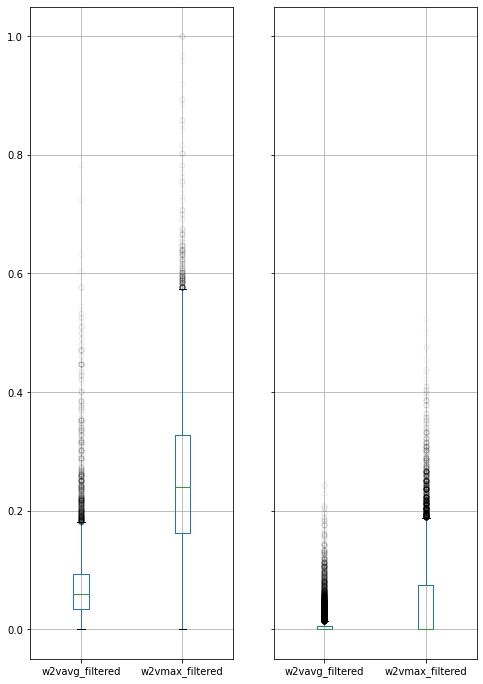

In [324]:
figure, axes = plt.subplots(1, 2, sharey = True, figsize = (8,12) )
final_train_merge_w2v_samo_related.boxplot(['w2vavg_filtered', 'w2vmax_filtered'], ax=axes[0], flierprops=dict(markersize=5, alpha=0.05))
final_train_merge_w2v_samo_unrelated.boxplot(['w2vavg_filtered', 'w2vmax_filtered'], ax=axes[1], flierprops=dict(markersize=5, alpha=0.05))

In [338]:
final_train_merge_w2v_samo_related['w2vavg_filtered'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.005162
0.10    0.015027
0.15    0.022296
0.20    0.028727
0.25    0.034469
0.30    0.039884
0.35    0.044689
0.40    0.049492
0.45    0.054324
0.50    0.059512
0.55    0.064736
0.60    0.070717
0.65    0.077294
0.70    0.084460
0.75    0.092956
0.80    0.103845
0.85    0.116533
0.90    0.134399
0.95    0.169031
Name: w2vavg_filtered, dtype: float64

In [339]:
final_train_merge_w2v_samo_unrelated['w2vavg_filtered'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.000000
0.10    0.000000
0.15    0.000000
0.20    0.000000
0.25    0.000000
0.30    0.000000
0.35    0.000000
0.40    0.000000
0.45    0.000000
0.50    0.000000
0.55    0.000000
0.60    0.000000
0.65    0.002202
0.70    0.003949
0.75    0.005824
0.80    0.008194
0.85    0.011654
0.90    0.017189
0.95    0.027940
Name: w2vavg_filtered, dtype: float64

In [340]:
final_train_merge_w2v_samo_related['w2vmax_filtered'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.064150
0.10    0.098058
0.15    0.125000
0.20    0.144338
0.25    0.162221
0.30    0.176777
0.35    0.192450
0.40    0.209657
0.45    0.223607
0.50    0.239046
0.55    0.253546
0.60    0.269680
0.65    0.288675
0.70    0.306186
0.75    0.327327
0.80    0.350823
0.85    0.377964
0.90    0.417029
0.95    0.476290
Name: w2vmax_filtered, dtype: float64

In [341]:
final_train_merge_w2v_samo_unrelated['w2vmax_filtered'].quantile([.05, .1, .15, .2, .25, .3, .35, .4, .45, .5, .55, .6, .65, .7, .75, .8, .85, .9, .95])

0.05    0.000000
0.10    0.000000
0.15    0.000000
0.20    0.000000
0.25    0.000000
0.30    0.000000
0.35    0.000000
0.40    0.000000
0.45    0.000000
0.50    0.000000
0.55    0.000000
0.60    0.000000
0.65    0.050546
0.70    0.065372
0.75    0.075378
0.80    0.086066
0.85    0.099185
0.90    0.117851
0.95    0.150756
Name: w2vmax_filtered, dtype: float64